# PCA HW - Mark Deutsch

In this HW, I use Principal Coordinate Analysis on a dataset of my own. The dataset I am using is the wine dataset that has been used previously in this class. The dataset has 13 attribute of wine, and then classifiers as to what class the wine falls in to. I go through and break down the dataset before I cluster it using PCA. 

In [61]:
import pandas as pd

df = pd.read_csv('wine.data.csv')
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [62]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [63]:
df.shape

(177, 14)

In [64]:
features = list(df.columns[1:14])

In [65]:
df_features = df[features]

In [66]:
df_features.corr(method = 'pearson')

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
Malic acid,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
Ash,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
Alcalinity of ash,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
Magnesium,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
Total phenols,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
Flavanoids,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
Nonflavanoid phenols,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
Proanthocyanins,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731
Color intensity,0.547883,0.250053,0.258643,0.020478,0.199337,-0.056401,-0.174411,0.140192,-0.027112,1.000000,-0.522615,-0.435744,0.315632


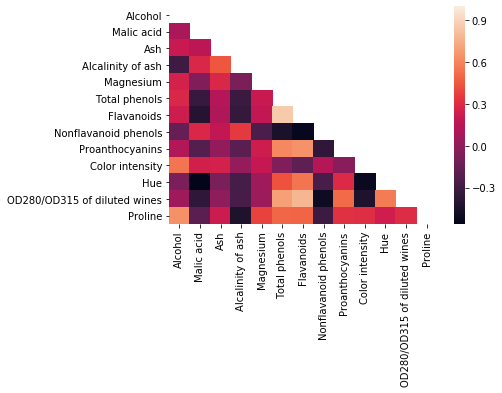

In [67]:
import seaborn as sns
import numpy as np
import matplotlib


corr = df_features.corr(method = 'pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask)

In [68]:
X_data = df.iloc[:,1:14]
Y_data = df.iloc[:,0]

In [85]:
X_data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [70]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler()
scaled_X = scaled_data.fit_transform(X_data)

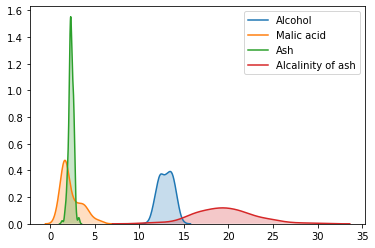

In [71]:
sns.kdeplot(X_data.iloc[:,0], shade = True)
sns.kdeplot(X_data.iloc[:,1], shade = True)
sns.kdeplot(X_data.iloc[:,2], shade = True)
sns.kdeplot(X_data.iloc[:,3], shade = True)

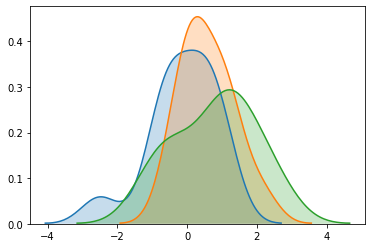

In [72]:
sns.kdeplot(scaled_X[0], shade = True)
sns.kdeplot(scaled_X[1], shade = True)
sns.kdeplot(scaled_X[2], shade = True)


In [86]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 4)
pca1.fit(scaled_X)
trained_pca1 = pca1.transform(scaled_X)

In [87]:
trained_pca1.shape

(177, 4)

In [88]:
pc_df = pd.DataFrame(data = trained_pca1, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [89]:
pc_df['Cluster'] = Y_data

In [90]:
pca1.explained_variance_ratio_

array([0.35983071, 0.1924128 , 0.1117946 , 0.07111109])

In [91]:
df1 = pd.DataFrame({'var':pca1.explained_variance_ratio_, 'PC':['PC1', 'PC2', 'PC3', 'PC4']})

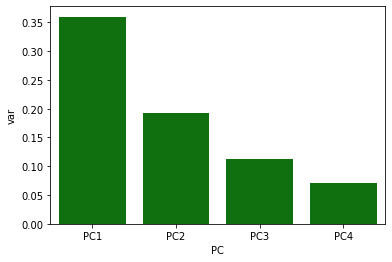

In [92]:
sns.barplot(x='PC', y ='var', data=df1, color='green')

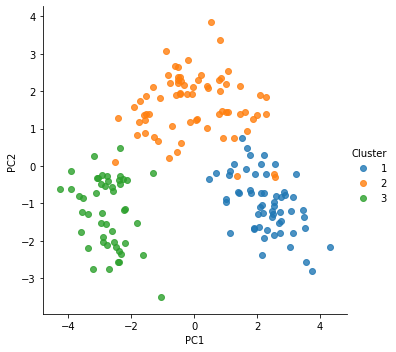

In [93]:
p = sns.lmplot(x='PC1', y ='PC2', data=pc_df,hue='Cluster',fit_reg=False, legend=True)

# Discussion 

As seen in the above table, the PCA was able to cluster the wine data into the respective classes. It can be seen from the explained variance ratio, that PCA1 accounts for 35.9% of the variance, while PCA2 accounts for 19.2% of the variance. 